In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('USA_Housing.csv')
pd.pandas.set_option('display.max_columns', None)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df = df.drop(columns='Address')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

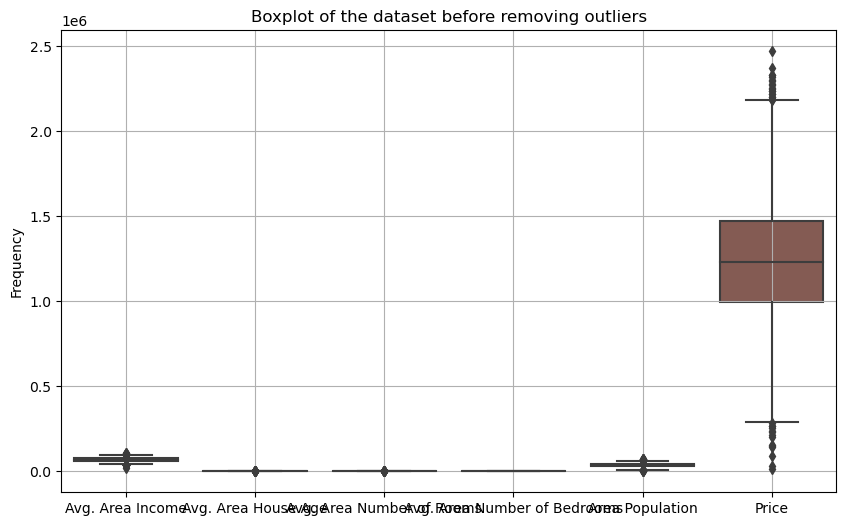

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of the dataset before removing outliers')
plt.ylabel('Frequency')
plt.xticks(range(6), df)
plt.grid(True)
plt.show()

In [6]:
data = df[df.columns]
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3 - Q1
UpperBound = Q3 + (1.5 * IQR)
LowerBound = Q1 - (1.5 * IQR)
outliers_data = (data < LowerBound) | (data > UpperBound)

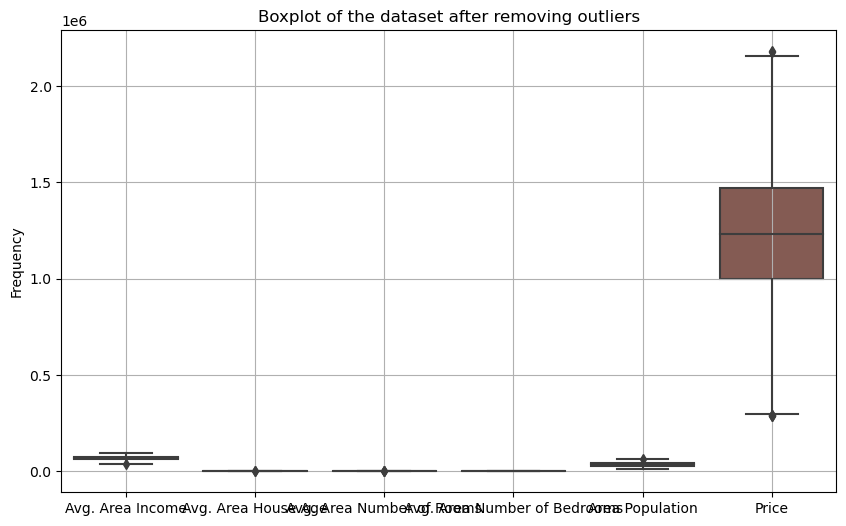

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[~outliers_data])
plt.title('Boxplot of the dataset after removing outliers')
plt.ylabel('Frequency')
plt.xticks(range(6), df)
plt.grid(True)
plt.show()

In [8]:
df = df.clip(lower=LowerBound, upper=UpperBound, axis=1)

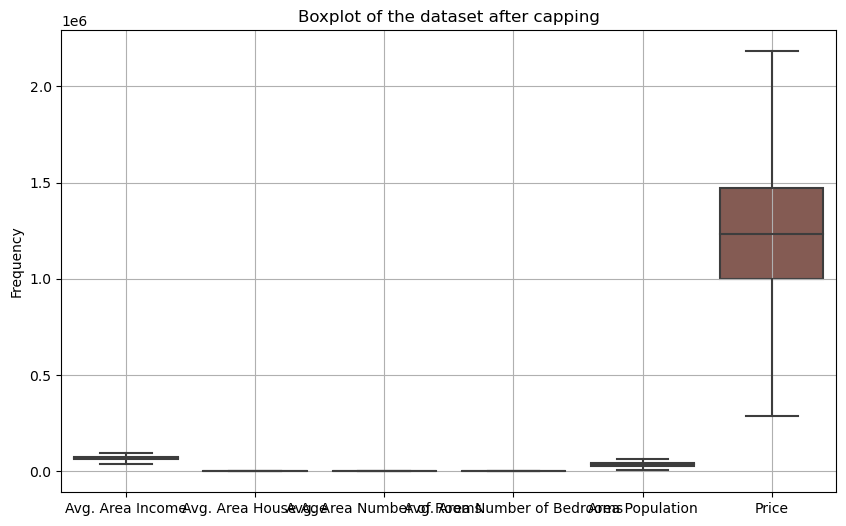

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of the dataset after capping')
plt.ylabel('Frequency')
plt.xticks(range(6), df)
plt.grid(True)
plt.show()

In [10]:
df.shape

(5000, 6)

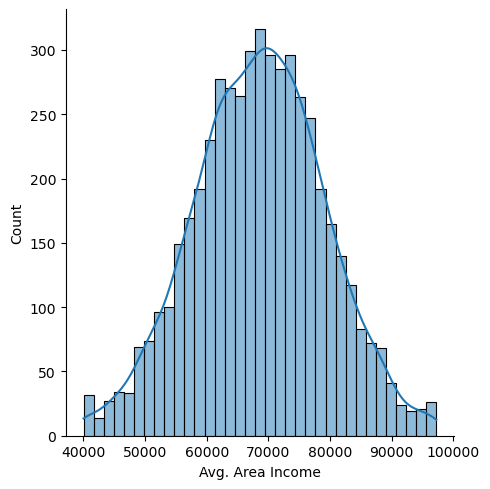

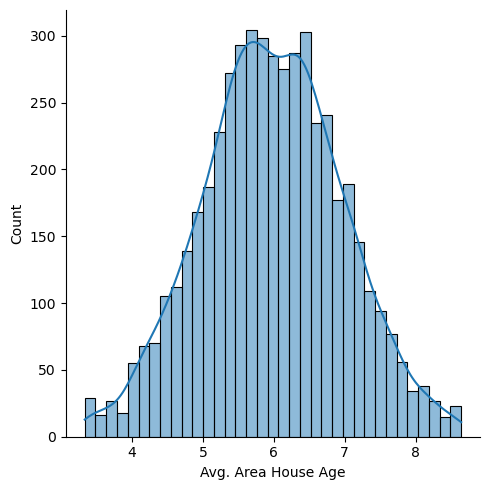

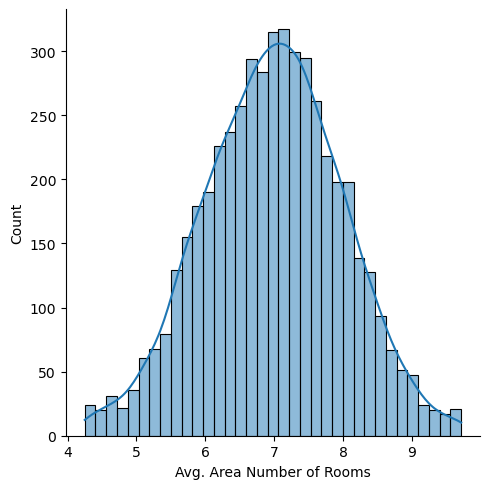

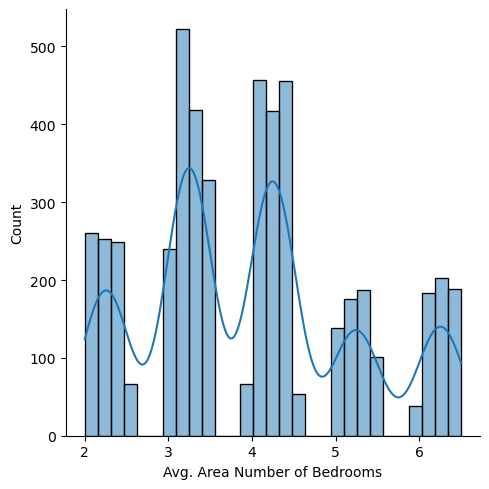

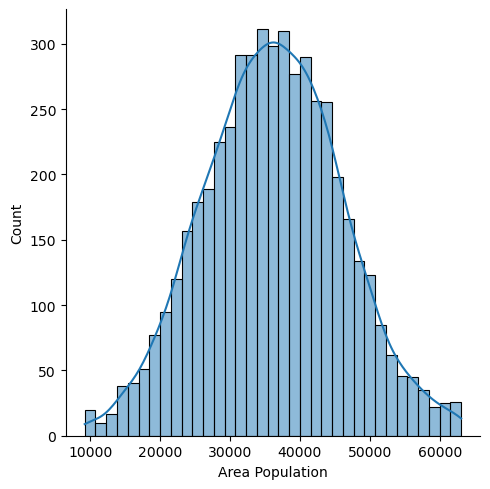

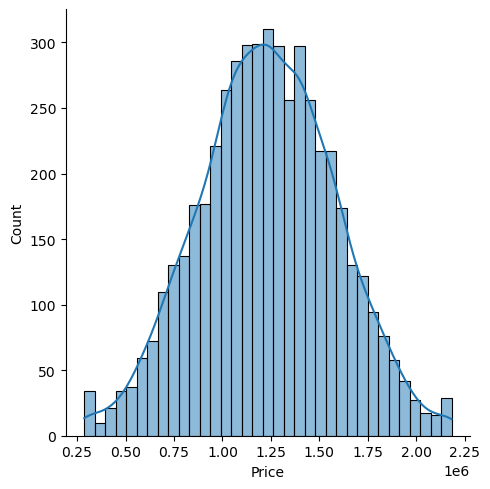

In [11]:
sns.displot(data=df[df.columns[0]], kde=True)
sns.displot(data=df[df.columns[1]], kde=True)
sns.displot(data=df[df.columns[2]], kde=True)
sns.displot(data=df[df.columns[3]], kde=True)
sns.displot(data=df[df.columns[4]], kde=True)
sns.displot(data=df[df.columns[5]], kde=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.iloc[:, :5]
Y = df.iloc[:, 5]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)

r2_train = r2_score(Y_pred_train, Y_train)
r2_test = r2_score(Y_pred_test, Y_test)

print("Training Accuracy : ", r2_train)
print("Testing Accuracy : ", r2_test)

Training Accuracy :  0.9102986768843903
Testing Accuracy :  0.9068985720551946


In [13]:
import pickle

with open('HousePrice.pkl', 'wb') as file:
    pickle.dump(lr, file)

with open('HousePrice.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

predictions = loaded_model.predict(X_test)
print("Testing Accuracy : ", loaded_model.score(X_test, Y_test))

Testing Accuracy :  0.9138135340627311


In [14]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor

# X = df.iloc[:, :5]
# Y = df.iloc[:, 5]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=150)

# reg_rf = RandomForestRegressor()
# reg_rf.fit(X_train, Y_train)

# Y_pred = reg_rf.predict(X_test)

# print("Training Accuracy : ", reg_rf.score(X_train, Y_train))
# print("Testing Accuracy : ", reg_rf.score(X_test, Y_test)) 